### Motivating Experiment


### Evaluation 1: Single Worklaod

In [3]:
import pandas as pd
from cProfile import label
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'


def exp1_plot_throughput(csv_file, ylim, optimal):
    df = pd.read_csv(csv_file)
    df.rename(columns=str.strip, inplace=True)

    plt.figure(figsize=(6, 4))
    plt.xlabel('Episode')
    plt.ylabel('Effective Throughput (tps)')
    plt.ylim(0, ylim)
    plt.plot(range(1, len(df) + 1), df['throughput'], label='Learned')
    plt.grid(True)
    plt.axhline(y=optimal, color="red", linestyle="--", label="Optimal")
    plt.legend(frameon=False)


##### Workload A: XOV+reorder
```json 
{
   "write_ratio": 0.2,
   "hot_key_ratio": 0.95,
   "num_keys": 10000,
   "num_hot_keys": 5,
   "trans_per_interval": 300,
   "interval": 50000,
   "execution_delay": 5000
}
```

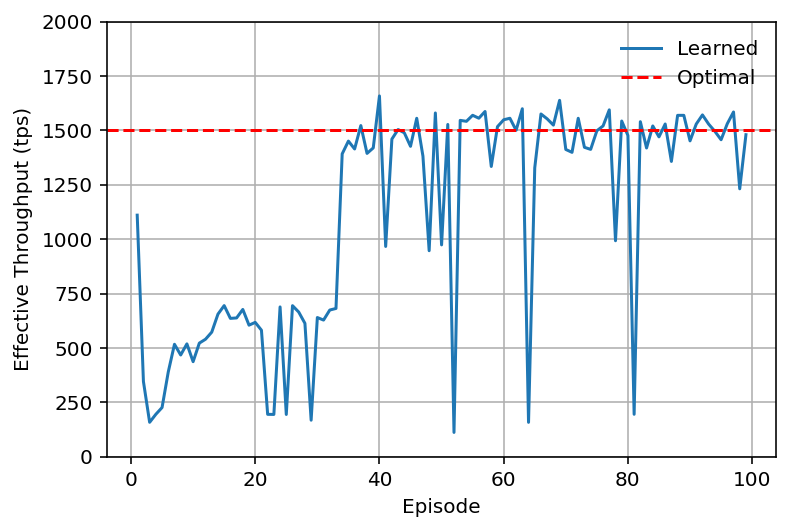

In [6]:
exp1_plot_throughput('data/eval1/workload_a_ada.csv', 2000, 1500)

##### Workload B: OXII
```json
{
   "write_ratio": 0.5,
   "hot_key_ratio": 0.99,
   "num_keys": 10000,
   "num_hot_keys": 10,
   "trans_per_interval": 100,
   "interval": 50000,
   "execution_delay": 1000
}
```

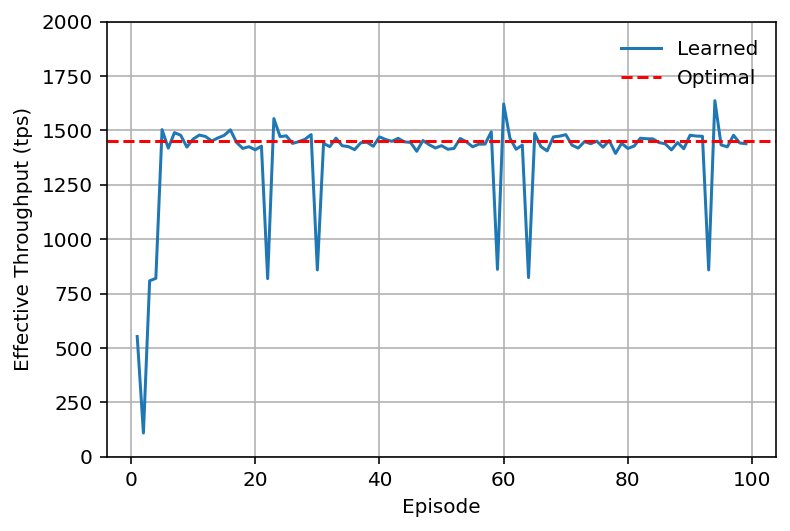

In [9]:
exp1_plot_throughput('data/eval1/workload_b_ada.csv', 2000, 1450)

##### Workload C: XOV
```json
{
   "write_ratio": 0.5,
   "hot_key_ratio": 0.1,
   "num_keys": 10000,
   "num_hot_keys": 10,
   "trans_per_interval": 300,
   "interval": 50000,
   "execution_delay": 10000
}
```

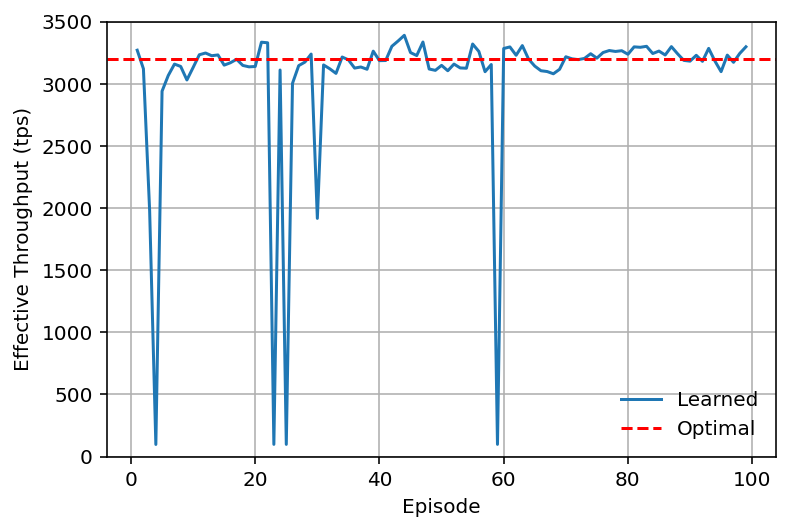

In [12]:
exp1_plot_throughput('data/eval1/workload_c_ada.csv', 3500, 3200)

##### Workload D: OX / StreamChain
```json
{
   "write_ratio": 0.9,
   "hot_key_ratio": 0.95,
   "num_keys": 10000,
   "num_hot_keys": 1,
   "trans_per_interval": 100,
   "interval": 50000,
   "execution_delay": 0
}
```

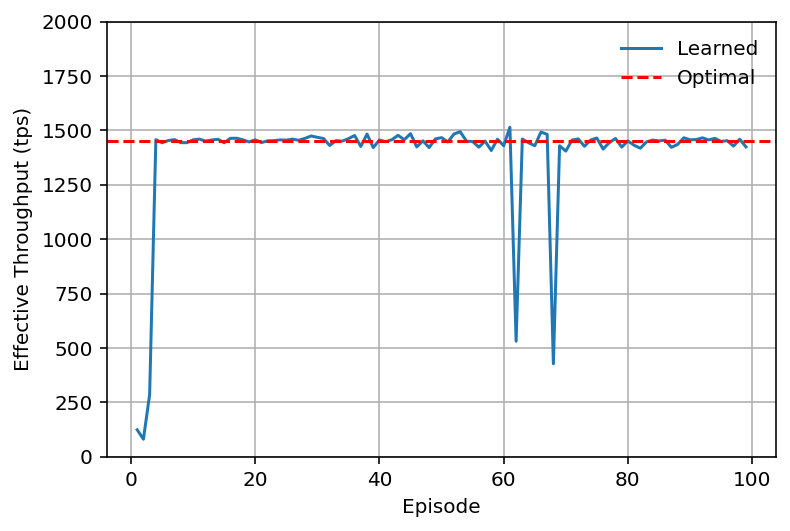

In [14]:
exp1_plot_throughput('data/eval1/workload_d_ada.csv', 2000, 1450)

### Evaluation 2: Switch Workload

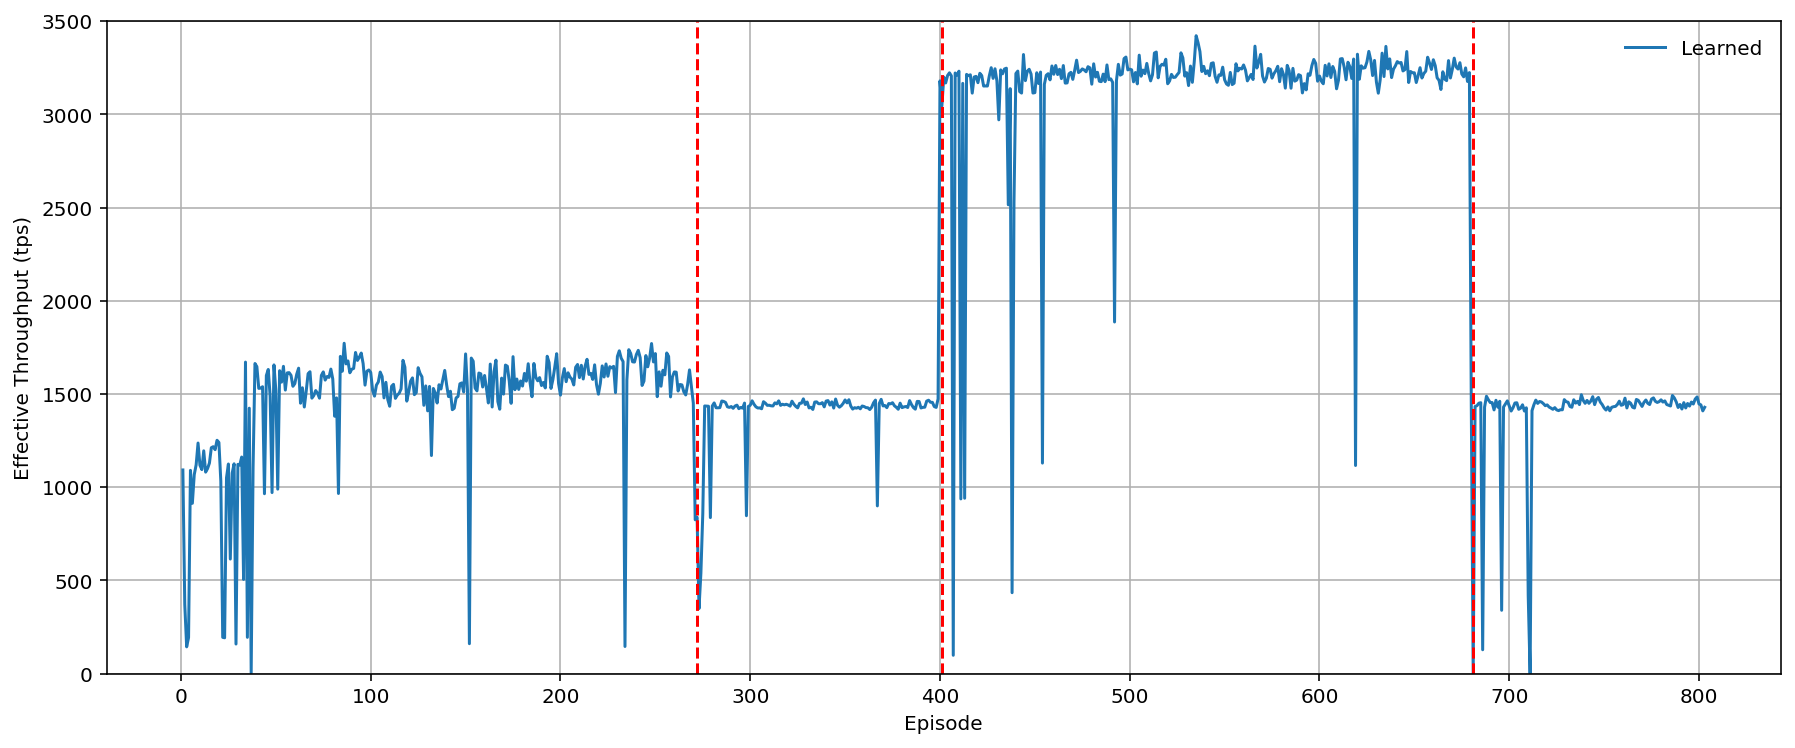

In [4]:
df = pd.read_csv('data/eval2/ts_eval_2_window_no.csv')
df.rename(columns=str.strip, inplace=True)

plt.figure(figsize=(15, 6))
plt.xlabel('Episode')
plt.ylabel('Effective Throughput (tps)')
plt.ylim(0, 3500)
plt.plot(range(1, len(df) + 1), df['throughput'], label='Learned')
plt.axvline(x=272, color="red", linestyle="--")
plt.axvline(x=401, color="red", linestyle="--")
plt.axvline(x=681, color="red", linestyle="--")
plt.grid(True)
plt.legend(frameon=False)
# effective transactions entire run = 6378962.